In [1]:
import pandas as pd
import numpy as np

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv('updated_train.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,h_distance,day,month,hour,minute,pickup_time,pickup_dropoff_loc
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,6.122493,1.498521,1.497580,14,3,17,24,17.400000,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,6.498282,1.805507,1.804374,12,6,0,43,0.716667,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661527,6.385098,6.381090,19,1,11,35,11.583333,6
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,6.063785,1.485498,1.484566,6,4,19,32,19.533333,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,6.077642,1.188588,1.187842,26,3,13,30,13.500000,0


In [4]:
test = pd.read_csv('updated_test.csv')
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,h_distance,day,month,hour,minute,pickup_time,pickup_dropoff_loc
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2.746426,2.744701,30,6,23,59,23.983333,8
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2.759239,2.757507,30,6,23,59,23.983333,6
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,1.306155,1.305335,30,6,23,59,23.983333,6
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,5.269088,5.265780,30,6,23,59,23.983333,2
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,0.960842,0.960239,30,6,23,59,23.983333,1


In [6]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [7]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                float64
distance                     float64
h_distance                   float64
day                            int64
month                          int64
hour                           int64
minute                         int64
pickup_time                  float64
pickup_dropoff_loc             int64
dtype: object

In [11]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [12]:
x = test['pickup_datetime'][0]
x

Timestamp('2016-06-30 23:59:58')

In [17]:
int(x.isoweekday() in [6,7])

0

In [14]:
train['weekday'] = train['pickup_datetime'].apply(lambda x:x.weekday())
test['weekday'] = test['pickup_datetime'].apply(lambda x:x.weekday())

In [18]:
train['isweekend'] = train['pickup_datetime'].apply(lambda x:int(x.isoweekday() in [6,7]))
test['isweekend'] = test['pickup_datetime'].apply(lambda x:int(x.isoweekday() in [6,7]))

In [19]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'h_distance', 'day', 'month', 'hour',
       'minute', 'pickup_time', 'pickup_dropoff_loc', 'weekday', 'isweekend'],
      dtype='object')

In [20]:
train['pickup_time'] = train['hour'] + (train['minute']/60)
test['pickup_time'] = test['hour'] + (test['minute']/60)

In [6]:
train['trip_duration'] = np.log(train['trip_duration']+1)

In [55]:
train.to_csv('updated_train.csv',index=False)
test.to_csv('updated_test.csv',index=False)

In [22]:
coord_pickup = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,                  
                          test[['pickup_latitude', 'pickup_longitude']].values))
coord_dropoff = np.vstack((train[['dropoff_latitude', 'dropoff_longitude']].values,                  
                           test[['dropoff_latitude', 'dropoff_longitude']].values))
# stacking vertically ie adding row

In [23]:
from sklearn.cluster import MiniBatchKMeans

In [52]:
coords = np.hstack((coord_pickup,coord_dropoff))# 4 dimensional data
kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10000).fit(coords)
for df in (train,test):
    df.loc[:, 'pickup_dropoff_loc'] = kmeans.predict(df[['pickup_latitude', 'pickup_longitude','dropoff_latitude','dropoff_longitude']])

In [44]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,h_distance,day,month,hour,minute,pickup_time,pickup_dropoff_loc,weekday,isweekend,bearing
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,1.497580,14,3,17,24,17.400000,47,0,0,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,1.804374,12,6,0,43,0.716667,32,6,1,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,6.381090,19,1,11,35,11.583333,24,1,0,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,1.484566,6,4,19,32,19.533333,17,2,0,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,1.187842,26,3,13,30,13.500000,20,5,1,179.473585


In [20]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,h_distance,day,month,hour,minute,pickup_time,pickup_dropoff_loc
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2.746426,2.744701,30,6,23,59,23.983333,8
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2.759239,2.757507,30,6,23,59,23.983333,6
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,1.306155,1.305335,30,6,23,59,23.983333,6
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,5.269088,5.265780,30,6,23,59,23.983333,2
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,0.960842,0.960239,30,6,23,59,23.983333,1


In [26]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
train['pickup_dropoff_loc'] = le.fit_transform(train['pickup_dropoff_loc'])
test['pickup_dropoff_loc'] = le.transform(test['pickup_dropoff_loc']) 

In [29]:
def update(x):
    if(x<0):
        return -x
    return x

In [30]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [31]:
def bearing_array(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [32]:
def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

In [33]:
for df in (train,test):
    df['bearing'] = bearing_array(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])

In [82]:
for df in (train,test):
    df['manhattan_distance'] = dummy_manhattan_distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])

In [34]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                float64
distance                     float64
h_distance                   float64
day                            int64
month                          int64
hour                           int64
minute                         int64
pickup_time                  float64
pickup_dropoff_loc             int64
weekday                        int64
isweekend                      int64
bearing                      float64
dtype: object

In [35]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'h_distance', 'day', 'month', 'hour',
       'minute', 'pickup_time', 'pickup_dropoff_loc', 'weekday', 'isweekend',
       'bearing'],
      dtype='object')

In [36]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost.sklearn import XGBRegressor

In [37]:
features = ['vendor_id', 'passenger_count','pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude','store_and_fwd_flag','day', 'month', 'hour', 'minute','h_distance',
            'pickup_time','pickup_dropoff_loc','weekday', 'isweekend','bearing']

In [47]:
xgb = XGBRegressor(learning_rate =0.01, n_estimators=1000, max_depth=10,
                   min_child_weight=3, gamma=0.005, colsample_bylevel=1.0 , colsample_bytree=0.9,reg_lambda=4,
                   objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27,subsample=0.8,reg_alpha=0.01)

In [48]:
xgb.fit(train[features],train['trip_duration'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
       colsample_bytree=0.9, gamma=0.005, learning_rate=0.01,
       max_delta_step=0, max_depth=10, min_child_weight=3, missing=None,
       n_estimators=1000, nthread=4, objective='reg:linear',
       reg_alpha=0.01, reg_lambda=4, scale_pos_weight=1, seed=27,
       silent=True, subsample=0.8)

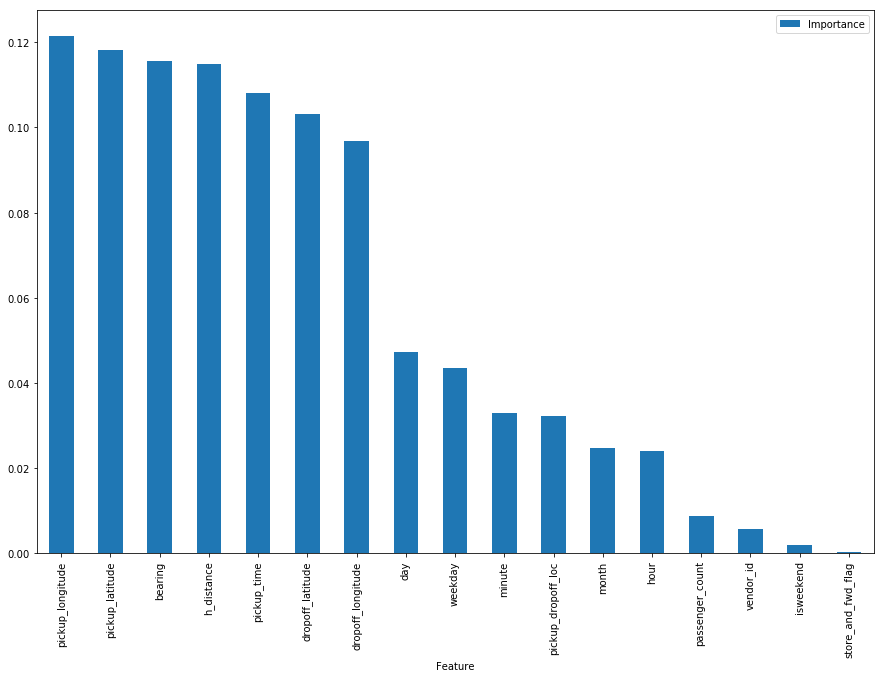

In [49]:
feature_importance = pd.Series(xgb.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [50]:
pred = xgb.predict(test[features])
print('prediction is done')

prediction is done


In [51]:
pred = np.exp(pred)-1
sub = pd.DataFrame()
sub['id'] = test['id']
sub['trip_duration'] = pred
sub['trip_duration'] = sub['trip_duration'].apply(lambda x:update(x))
sub.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.


In [56]:
import lightgbm as lgb

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train['trip_duration'], test_size = 0.5)

In [60]:
dtrain = lgb.Dataset(X_train, y_train)
dval = lgb.Dataset(X_test, y_test)

In [72]:
lgb_model = lgb.LGBMRegressor(boosting_type='gbdt', max_depth=10, learning_rate=0.01, n_estimators=1000,
                              min_split_gain=0, min_child_weight=3,
                              min_child_samples=10,subsample=0.8, subsample_freq=1, colsample_bytree=0.9, reg_alpha=0.01,
                              reg_lambda=4)

In [73]:
lgb_model.fit(train[features],train['trip_duration'])

LGBMRegressor(boosting_type='gbdt', colsample_bytree=0.9, learning_rate=0.01,
       max_bin=255, max_depth=10, min_child_samples=10, min_child_weight=3,
       min_split_gain=0, n_estimators=1000, nthread=-1, num_leaves=31,
       objective='regression', reg_alpha=0.01, reg_lambda=4, seed=0,
       silent=True, subsample=0.8, subsample_for_bin=50000,
       subsample_freq=1)

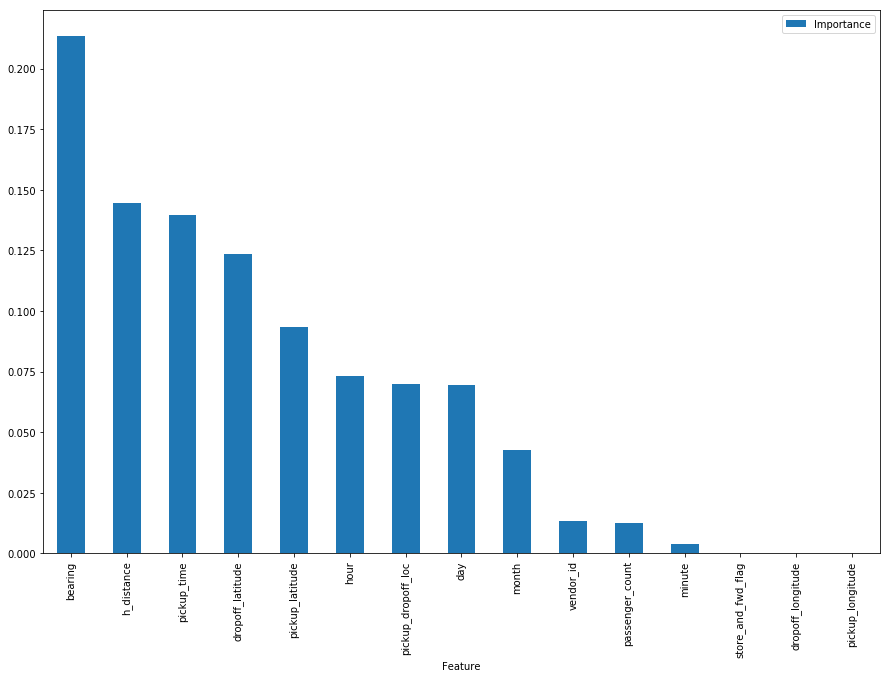

In [75]:
feature_importance = pd.Series(lgb_model.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [74]:
pred = lgb_model.predict(test[features])

In [76]:
pred = np.exp(pred)-1
sub = pd.DataFrame()
sub['id'] = test['id']
sub['trip_duration'] = pred
sub['trip_duration'] = sub['trip_duration'].apply(lambda x:update(x))
sub.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.
